In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
import tensorflow as tf

In [63]:
x_data = np.linspace(0.0,10.0,1000000)

In [64]:
noise = np.random.randn(len(x_data))

In [65]:
noise.shape

(1000000,)

In [66]:
#y = mx + b
#b = 5

In [67]:
y_true = (0.5 * x_data) + 5 + noise

In [68]:
x_df = pd.DataFrame(data = x_data,columns=['X Data'])

In [69]:
y_df = pd.DataFrame(data = y_true,columns=['Y'])

In [70]:
y_df.head()

,Y
0,4.087777
1,5.694411
2,5.451058
3,4.439222
4,4.333409


In [71]:
my_data = pd.concat([x_df,y_df], axis =1)

In [72]:
my_data.head()

,X Data,Y
0,0.00000,4.087777
1,0.00001,5.694411
2,0.00002,5.451058
3,0.00003,4.439222
4,0.00004,4.333409


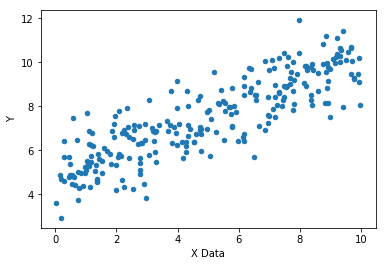

In [73]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [74]:
batch_size = 8

In [75]:
m =  tf.Variable(0.81)
b = tf.Variable(0.17)

In [76]:
xph = tf.placeholder(tf.float32,[batch_size])

In [77]:
yph = tf.placeholder(tf.float32,[batch_size])

In [78]:
y_model = m*xph + b

In [79]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [80]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [81]:
init = tf.global_variables_initializer()

In [82]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size = batch_size)
    
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
    
        sess.run(train,feed_dict = feed)
    model_m , model_b = sess.run([m,b])

In [83]:
model_m

0.51871169

In [84]:
model_b

4.9934068

In [85]:
y_hat = x_data*model_m + model_b

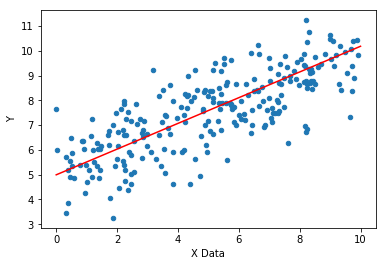

In [86]:
my_data.sample(250).plot(kind='scatter',x='X Data', y="Y")
plt.plot(x_data,y_hat, 'r')

## TF ESTIMATOR

In [87]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [88]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_tf_random_seed': 1, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/zz/zyxvpxvq6csfxvn_n0002d4m000l95/T/tmpez8ipw8x', '_log_step_count_steps': 100, '_keep_checkpoint_max': 5}


In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size= 0.3, random_state = 101)

In [91]:
x_train.shape

(700000,)

In [92]:
x_eval.shape

(300000,)

In [93]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=None,shuffle=True)

In [94]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=1000,shuffle=False)

In [99]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=4,num_epochs=1000,shuffle=False)

In [96]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/zz/zyxvpxvq6csfxvn_n0002d4m000l95/T/tmpez8ipw8x/model.ckpt.
INFO:tensorflow:step = 1, loss = 620.353
INFO:tensorflow:global_step/sec: 1261.38
INFO:tensorflow:step = 101, loss = 7.31065 (0.080 sec)
INFO:tensorflow:global_step/sec: 1162.83
INFO:tensorflow:step = 201, loss = 13.164 (0.086 sec)
INFO:tensorflow:global_step/sec: 1241.37
INFO:tensorflow:step = 301, loss = 7.61473 (0.081 sec)
INFO:tensorflow:global_step/sec: 1153.72
INFO:tensorflow:step = 401, loss = 12.3013 (0.086 sec)
INFO:tensorflow:global_step/sec: 1164.54
INFO:tensorflow:step = 501, loss = 11.6693 (0.086 sec)
INFO:tensorflow:global_step/sec: 1073.04
INFO:tensorflow:step = 601, loss = 11.1709 (0.093 sec)
INFO:tensorflow:global_step/sec: 1155.33
INFO:tensorflow:step = 701, loss = 12.3715 (0.086 sec)
INFO:tensorflow:global_step/sec: 1147.49
INFO:tensorflow:step = 801, loss = 7.17571 (0.087 sec)
INFO:tensorflow:global_step/s

In [97]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Starting evaluation at 2017-12-04-22:12:46
INFO:tensorflow:Restoring parameters from /var/folders/zz/zyxvpxvq6csfxvn_n0002d4m000l95/T/tmpez8ipw8x/model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:E

INFO:tensorflow:Evaluation [215/1000]
INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [431/1000]
INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorf

In [100]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2017-12-04-22:14:03
INFO:tensorflow:Restoring parameters from /var/folders/zz/zyxvpxvq6csfxvn_n0002d4m000l95/T/tmpez8ipw8x/model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:E

INFO:tensorflow:Evaluation [215/1000]
INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [431/1000]
INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorf

In [101]:
print('training data metrics')
print(train_metrics)

training data metrics
{'global_step': 1000, 'average_loss': 1.0776166, 'loss': 8.6209326}


In [103]:
print('eval metrics')
print(eval_metrics)

eval metrics
{'global_step': 1000, 'average_loss': 1.0942471, 'loss': 4.3769884}


In [106]:
brand_new_data = np.linspace(0,10,10)

In [108]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data}, shuffle=False)

In [112]:
list(estimator.predict(input_fn = input_fn_predict))

INFO:tensorflow:Restoring parameters from /var/folders/zz/zyxvpxvq6csfxvn_n0002d4m000l95/T/tmpez8ipw8x/model.ckpt-1000


[{'predictions': array([ 4.37143707], dtype=float32)},
 {'predictions': array([ 5.04430199], dtype=float32)},
 {'predictions': array([ 5.7171669], dtype=float32)},
 {'predictions': array([ 6.39003134], dtype=float32)},
 {'predictions': array([ 7.06289625], dtype=float32)},
 {'predictions': array([ 7.73576069], dtype=float32)},
 {'predictions': array([ 8.4086256], dtype=float32)},
 {'predictions': array([ 9.08149052], dtype=float32)},
 {'predictions': array([ 9.75435543], dtype=float32)},
 {'predictions': array([ 10.42722034], dtype=float32)}]

In [113]:
predictions = []

for pred in estimator.predict(input_fn = input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from /var/folders/zz/zyxvpxvq6csfxvn_n0002d4m000l95/T/tmpez8ipw8x/model.ckpt-1000


In [114]:
predictions

[array([ 4.37143707], dtype=float32),
 array([ 5.04430199], dtype=float32),
 array([ 5.7171669], dtype=float32),
 array([ 6.39003134], dtype=float32),
 array([ 7.06289625], dtype=float32),
 array([ 7.73576069], dtype=float32),
 array([ 8.4086256], dtype=float32),
 array([ 9.08149052], dtype=float32),
 array([ 9.75435543], dtype=float32),
 array([ 10.42722034], dtype=float32)]

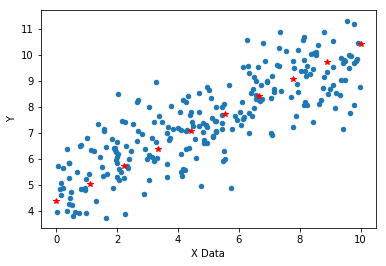

In [116]:
my_data.sample(n=250).plot(kind = 'scatter', x = 'X Data', y = 'Y')
plt.plot(brand_new_data, predictions, 'r*')